<a href="https://colab.research.google.com/github/codyub/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch4_1~5_(2_%EC%A0%9C%EC%99%B8)_pg_183~227_(201~211_%EC%A0%9C%EC%99%B8)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류

# 분류의 개요

- 지도학습은 레이블이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
- 지도학습의 대표적인 유형인 분류는 학습 데이터로 주어진 데이터의 피처와 레이블 값을 머신러닝 알고리즘으로 학습해 모델을 생성하고 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것
- 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것

# 분류의 종류

1. 베이즈통계와 생성 모델에 기반한 나이브 베이즈
2. 독립변수와 종속변수의 선형관계성에 기반한 로지스틱 회귀
3. 데이터 균일도에 따른 규칙 기반의 결정트리
4. 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신
5. 근접 거리를 기준으로 최소 근접 알고리즘
6. 심층 연결 기반의 신경망
7. 서로 다른 또는 같은 머신러닝 알고리즘을 결합한 앙상블

- 앙상블 방법: 분류에서 가장 각광을 받는 방법 중 하나로 알고리즘을 결합해서 사용하는 것. 서로 다른 또는 같은 알고리즘을 단순히 결합한 형태도 있지만, 일반적으로는 배깅, 부스팅 방식으로 나뉨. 배깅 방식의 대표인 랜덤 포레스트는 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용
- 근래의 앙상블 방법은 부스팅 방식으로 지속해서 발전하고 있음. 
- 딥러닝이 비정형 데이터를 다루는 것에 초점을 맞추고 있지만, 앙상블이 매우 높은 예측 성능으로 인해 많은 분석가와 데이터 과학자들에게 애용
- 그래디언트 부스팅: 뛰어난 예측 성능을 가지고 있지만 수행 시간이 너무 오래 걸리는 단점으로 최적화 모델 튜닝이 어려움
- XgBoost와 LighGBM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서 수행 시간을 단축시킨 알고리즘이 계속 등장하면서 정형 데이터와 분류 영역에서 가장 활용도 높은 알고리즘으로 자리 잡음


- 결정 트리: 쉽고 유연한 알고리즘이며, 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적지만 예측 성능을 향상 시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합이 발생해 반대로 예측 성능이 저하될 수 있다는 단점.
- 하지만, 위 단점은 앙상블 기법에서는 장점이 됨. 
- 앙상블은 많은 여러 개의 약한 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이터 하면서 예측 성능을 향상 시킴


# 02 결정 트리

- ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘.
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것
- if, else를 자동으로 찾아내 예측을 위한 규칙을 만드는 알고리즘.
- 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우합니다. 
- 규칙 노드: 규칙 조건이 되는 것
- 리프 노드: 결정된 클래스 값
- 서브 트리: 새로운 규칙 조건마다 생성
- 데이터 세트에 피처가 있고, 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어짐.
- 하지만, 많은 규칙은 과적합으로 이어지기 쉬움 = 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.
- 가능한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 한다. --> 어떻게 트리를 분할할 것인가가 중요. = 균일한 데이터 세트 구성의 필요

- 균일한 데이터 세트: 결정노드는 정보의 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬 = 정보 균ㅇ리도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트로 쪼개는 방식을 내려가면서 반복해 데이터 값을 예측한다. 
- 정보의 균일도 측정 방법: 엔트로피 이용(information gain, 정보이득 지수), 지니 계수(지니 계수가 낮은 속성 기준으로 분할)
- 사이킷런의 결정트리 알고리즘은 지니 계수 이용해 데이터 세트 분할. 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정. 


# 결정 트리 모델의 트징

- 장점: 정보의 균일도라는 룰을 기반으로 해 알고리즘이 쉽고 직관적, 정보 균일도만 신경쓰므로 각 피처 스케일링과 정규화 같은 전처리 작업이 필요하지 않음. 
- 단점: 과적합으로 정확도가 떨어지는 경향이 있음. 피처 정보의 균일도에 따른 룰 규칙으로 서브 트리를 계속 만들면 깊이가 커지고 복잡해짐. -> 트리 크기를 사전에 제한하는 튜닝 필요

# 결정 트리 파라미터

- 사이킷런의 결정트리 알고리즘: DecisionTreeClassifier, DecisionTreeRegressor 클래스
- 사이킷런 결정트리 구현: CART(Classification and regression tree) 알고리즘 기반. 분류와 회귀 모두 가능한 알고리즘. 
- DecisionTreeClassifier: 분류
- DecisionTreeRegressor : 회귀

- min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수(디폴트-2), 과적합 제어로 사용, 작게 설정할수록 노드가 많아져 과적합
- min_samples_leaf: 말단 노드가 되기 위한 최소한의 샘플 데이터 수, 과적합 제어 용도, 비대칭적 데이터의 경우, 특정 클래스의 데이터가 극도로 작을 수 있어, 이 경우에는 작게 설정 필요. 
- max_features: 최적의 분할을 위해 고려할 최대 피처 개수(디폴트-None=데이터 세트의 모든 피처 사용). 
> 1. int=대상 피처 개수 
> 2. float=전체 피처 중 대상 피처 퍼센트 
> 3. sqrt = sqrt(전체 피처 개수) 만큼 선정
> 4. auto = sqrt와 동일, 
> 5. log=log2(전체 피처 개수)
> 6. None=전체 피처 선정

- max_depth: 트리의 최대 깊이(디폴트-None=깊이 계속 키움), 과적합할 수 있으므로 제어가 필요
- max_leaf_nodes: 말단 노드의 최대 개수

# 결정 트리 모델의 시각화: Graphviz

- 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지. 
- export_graphviz(학습이 완료된 estimator, 피처의 이름 리스트, 레이블 이름 리스트): 학습된 결정트리 규칙을 실제 트리 형태로 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터 로딩, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data, iris_data.target,
                                                 test_size=0.2,random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

# graphviz 시각화

In [3]:
from sklearn.tree import export_graphviz

# export_graphviz() 호출 결과로 out_file로 지정된 tree.dot 파일을 생성하기
export_graphviz(dt_clf, out_file = 'tree.dot', class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)
# export_graphviz(학습이 완료된 estimator, output파일명, 결정 클래스의 명칭, 피처의 명칭)

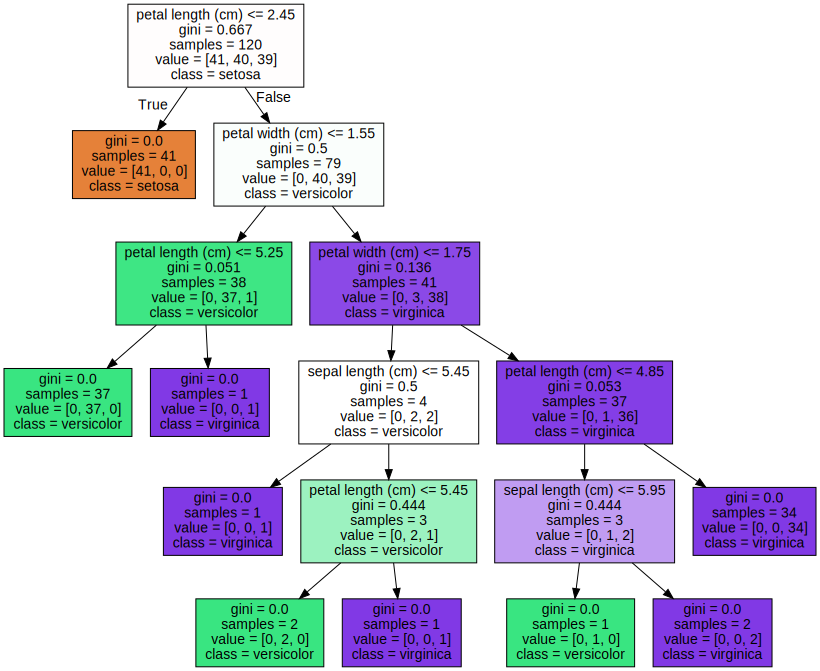

In [4]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

- petal length (cm) <= 2.45 : 자식 노드를 만들기 위한 규칙 조건
- gini: 다음  value=[]로 주어진 데이터 분포에서의 지니 계수
- samples: 현 규칙에 해당하는 데이터 건수
- value=[]는 클래스 값 기반의 데이터 건수, 붓꽃 데이터세트는 클래스 값으로 0,1,2를 갖고 있으며, [41,40,39]이면, 각각 0이 41개, 1이 40개 2가 39개로 데이터가 구성되어 있다고 생각하면 됨.

# 1번 노드 지표 해석


> 1. samples = 120: 전체 데이터가 120개
> 2. value=[41,40,39] 각각 0이 41개, 1이 40개 2가 39개로 데이터가 구성
> 3. sample 120개가 위 value로 분포되어 있으므로, 지니 계수는 0.667
> 4. 맨 위 규칙으로 자식 노드 생성
> 5. class=setosa: 하위 노드를 가질 경우, setosa의 개수가 41개로 가장 많다는 의미



# 2번 노드 지표 해석
> 1. 41개의 샘플 데이터 모두 setosa이므로 예측 클래스는 setosa
> 2. 지니계수는 0

- 위와 같은 방법을 반복해서 자식 노드를 만들어낸다. 
- 각 노드의 색은 붓꽃 데이터 레이블 값을 의미함. 색이 짙을수록 지니 계수가 낮고, 해당 레이블에 속하는 샘플 데이터가 많다는 의미.
- 결정트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요
- 몇 개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여. 모델을 좀 더 간결하고 이상치에 강한 모델으르 만들 수 있다. 

# DecisonTreeClassifier객체의 feature_importances 속성: 결정트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표 제공
> feature_importances는 ndarray 형태로 값을 반환. 피처 순서대로 값이 할당. 값이 높을수록 해당 피처의 중요도가 높음을 의미. 

# 붓꽃 데이터의 피처별 결정 트리 알고리즘에서의 중요도 추출

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


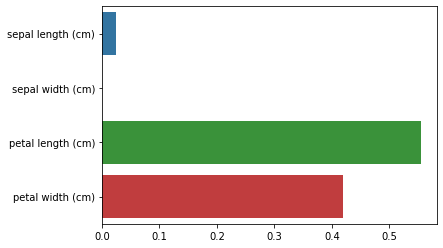

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

# 결정 트리의 과적합


> 결정트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지, 이로 인한 과적합 문제를 시각화로 알아보기 


> - make_classification(): 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록함. 반환되는 객체는 피처 데이터 세트, 클래스 레이블 데이터 세트




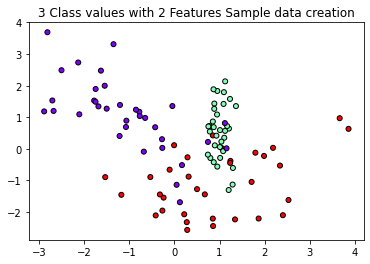

In [6]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, n_classes = 3, n_clusters_per_class = 1,random_state = 0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s = 25, cmap = 'rainbow', edgecolor = 'k')

# 위 데이터 세트를 기반으로 결정트리 학습


> 첫 번째 학습: 결정트리 생성에 별다른 제약 없도록 하이퍼 파라미터 디폴트




In [8]:
import numpy as np

# visualize_boundary() 함수
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

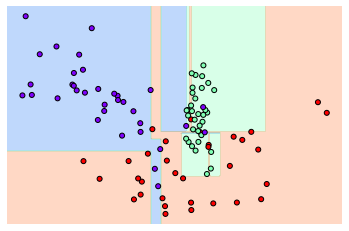

In [9]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 일부 이상치 데이터 분류를 위한 기준 경계가 매우 많아짐. 
- 모델이 너무 복잡 --> 과적합

> 두 번째 학습: min_samples_leaf=6

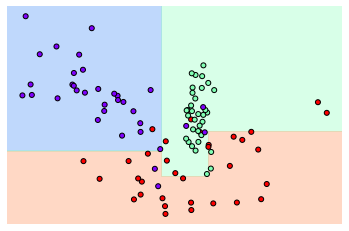

In [10]:
# min_samples_leaf = 6으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 좀 더 일반화된 분류

# 03 앙상블 학습

- 앙상블 학습을 통한 분류: 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법. 앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것. 
- 비정형 데이터는 딥러닝이 뛰어난 성능을 보이고 있지만, 대부분의 정형 데이터 분류는 앙상블이 뛰어난 성능
- 앙상블 알고리즘의 예: 랜덤 포레스트, 그래디언트 부스팅
- 앙상블 학습의 유형: 보팅, 배깅, 부스팅이 대표적, 스태깅 등도 포함함.
- 보팅과 배깅: 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식. 보팅은 서로 다른 알고리즘 가진 분류기 결합, 배깅은 각각 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다른게 가져가면서 학습을 수행.(예) 랜덤 포레스트)
- 부스트스트래핑 분할 방식: 개별 분류기에 데이터 샘플링해서 추출하는 방식 
- 배깅 앙상블 방식: 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해 최종 예측 결과를 선정하는 방식. 교차 검증과 다르게 데이터 세트간의 중첩을 허용
- 부스팅: 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습돠 예측을 진행하는 것. 예측 성능이 뛰어남.
- 스태깅: 여러 다른모델의 예측 결괏값을 다시 학습 데이터로 만들어 다른 모델로 재학습 시켜 결과를 예측하는 방법

# 보팅 유형: 하드 보팅, 소프트 보팅
> 하드 보팅을 이용한 분류: 다수결과 유사. 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정

> 소프트 보팅을 이용한 분류: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정. 일반적으로 보팅은 소프트 보팅을 이용함. 예측 성능이 하드 보팅보다 좋은 경향

# 보팅 분류기: VotingClassifier
> 사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공. 

# 보팅 앙상블: 위스콘신 유방암 데이터 세트 예측
> 로지스틱 회귀와 KNN을 기반으로 보팅 분류기 만들기

In [11]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [13]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft') # estimators는 리스트 값으로 보팅에 사용될 여러 분류기 객체들을 튜플 형식으로 입력받음. 

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


# 04 랜덤 포레스트
> 앙상블 알고리즘 중 비교적 빠른 수행속도, 다양한 영역에서 높은 예측 성능, 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정. 

- 배깅은 보팅과 다르게 같은 알고리즘으로 여러 개의 분류기를 만들어 보팅으로 최종 결정하는 알고리즘. 예) 랜덤 포레스트
- 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트 = 부트스트래핑 분할 방식
- 서브세트의 데이터 건수는 전체 데이터 건수와 동일하지만, 개별 데이터가 중첩되어 만들어짐. 
- 데이터가 중첩돈 개별 데이터 세트에 결정 트리 분류기를 각각 적용하는 것이 랜덤 포레스트
- 사이킷런은 RandomForestClassifier 클래스를 통해 랜덤 포레스트 기반의 분류를 지원
- 


In [16]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/ESAA") # working directory를 설정함. 이제 불러올 때 파일 이름만 사용해도 알아서 해당 경로에서 가져옴.

Mounted at /content/drive


In [17]:
import pandas as pd

# ValueError: Duplicate names are not allowed
# 위 오류를 수정하기 위한 코드
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

# 사용자 행동 데이터셋에 DataFrame을 반환하는 함수
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA/필사/UCI HAR Dataset/UCI HAR Dataset/features.txt',sep='\s+', header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. Column 명은 feature_name 적용
    My_X_train = pd.read_csv('/content/drive/MyDrive/ESAA/필사/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',sep='\s+', names = feature_name)
    My_X_test = pd.read_csv('/content/drive/MyDrive/ESAA/필사/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    My_y_train = pd.read_csv('/content/drive/MyDrive/ESAA/필사/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    My_y_test = pd.read_csv('/content/drive/MyDrive/ESAA/필사/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return My_X_train, My_X_test, My_y_train, My_y_test

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 에측 성능 평가
# 랜덤 포레스트 학습 
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)

# 별도의 테스트셋으로 예측 성능 평가
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


# 랜덤 포레스트 하이퍼 파라미터 및 튜닝
> 트리 기반의 앙상블 알고리즘의 단점: 하이퍼 파라미터가 너무 많아 튜닝을 위한 시간이 많이 소요됨. 

- n_estimators: 결정 트리의 개수 지정(디폴트-10), 많이 설정할수록 좋은 성능을 기대할 수 있지만, 증가시킨다고 무소건 향상되지 않고, 시간이 오래걸림
- max_features: 결정 트리의 max_features와 동일, 디폴트(auto(=sqrt))
- max_depth, min_samples_leaf: 결정트리의 과적합을 개선하기 위해 사용


# GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝
> n_estimators = 100, CV=2 로만 설정해 최적의 하이퍼 파라미터를 구하는 것이 목표. 이후 300으로 증가시켜 예측 성능을 평가할 예정
> CPU 병렬 처리도 효과적으로 수행되어 빠른 학습이 가능함. 

In [20]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


- n_estimators=300, 최적하 하이퍼 파라미터 데이터로 다시 RandomForestClassifier 학습 후 별도의 테스트 데이터 세트에서 예측 성능 측정

In [21]:
rf_clf1 = RandomForestClassifier(n_estimators=100,  min_samples_leaf=6, max_depth=16, 
                                                              min_samples_split=2, random_state=0)

rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9260


# 피처의 중요도 막대그래프로 시각화: feature_importances



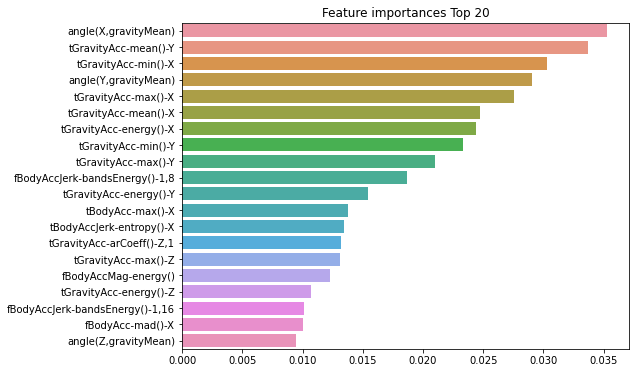

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()